# PSET 4

## Question 1

### a) Testable Implications

We derive testable implications by analyzing **d-separation** in the DAG.


Using d-separation:
1. $( Z_1 \perp Y \mid \{X_1, X_2, D, M\} )$  
   - $( Z_1 )$ only affects $( Y )$ via $( X_1 )$ and $( X_2 )$, so conditioning on both should block all paths.

2. $( Z_2 \perp D \mid \{X_2\} )$  
   - $( Z_2 )$ affects $( D )$ only through $( X_2 )$, so conditioning on $( X_2 )$ should block the effect.



### b) Testable Implications When Only D, Y, X₂, and M are Measured

We check if we can still test conditional independence constraints.

- $( X_2 \perp Y \mid \{D, M\} )$  
  - If we assume $( X_2 )$ affects $( Y )$ only through $( D )$ and $( M )$, conditioning on these variables should block any association.

- $( D \perp M \mid \{X_2\} )$  
  - If $( X_2 )$ is a common cause, then controlling for it should remove the association.


### c) Testable Implications When Only D, Y, and X₂ are Measured

- $( X_2 \perp Y \mid D )$  
  - $( X_2 )$ only affects $( Y )$ through $( D )$. Conditioning on $( D )$ should block any association.

- $( D \perp X_2 )$  
  - If $( D )$ has no unblocked paths to $( X_2 )$, they should be independent.


### d) Testable Implications When All but $( X_2 )$ are Measured


- $( X_1 \perp Y \mid \{D, M, X_3\} )$  
  - $( X_1 )$ affects $( Y )$ only through $( D )$, $( M )$, or $( X_3 )$. If conditioned on them, $( X_1 )$ and $( Y )$ should be independent.

- $( X_3 \perp D \mid \{M, Y\} )$  
  - If $( X_3 )$ only affects $( D )$ through $( Y )$ and $( M )$, conditioning on them should block all paths.


#### Statistical Test to Distinguish Between Model 1 and the Alternative Model

### e) Alternative Model (Reversing $( X_2 \to D )$ Arrow)

- **Chi-Square Conditional Independence Test**
  - Test: $( D \perp X_2 \mid \{X_1, X_3\} )$
  - If independence holds, supports **$( D \to X_2 )$**
  - If dependence holds, supports **$( X_2 \to D )$**

- **Likelihood Ratio Test (BIC)**
  - Compare model fits for $( X_2 \to D )$ vs $( D \to X_2 )$.


### Analyzing Results with Daggity, PGYMPY

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
/Users/benjaminzaidel/opt/anaconda3/envs/ALL_PYTHON/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


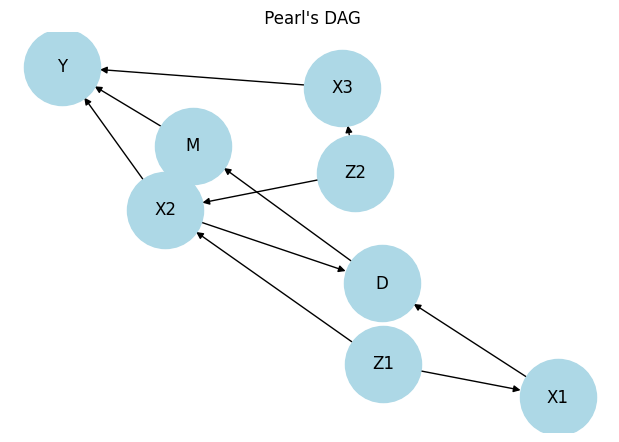

Testable Implications from pgmpy:
Z1 ind. Y | {X1, X2, D, M}: Yes
Z2 ind. D | {X2}: Yes
X2 ind. Y | {D, M}: Yes
D ind. M | {X2}: Yes
X2 ind. Y | D: Yes
D ind. X2: Yes
X1 ind. Y | {D, M, X3}: Yes
X3 ind. D | {M, Y}: Yes


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork

# Define the  DAG structure
model = BayesianNetwork([
    ("Z2", "X3"), ("X3", "Y"), 
    ("Z2", "X2"), ("X2", "Y"), 
    ("Z1", "X1"), ("X1", "D"), 
    ("Z1", "X2"), ("X2", "D"), 
    ("X3", "Y"), ("D", "M"), ("M", "Y")
])

# Visualizing the  DAG
plt.figure(figsize=(6, 4))
G = nx.DiGraph(model.edges())
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="black")
plt.title(" Pearl's DAG")
plt.show()

# Check d-separation conditions (Testable implications)
def check_d_separation(model, var1, var2, given):
    return model.is_dconnected(var1, var2, given)  # Using the correct method

# Testable implications (using d-separation criterion)
testable_implications = {
    "Z1 ind. Y | {X1, X2, D, M}": check_d_separation(model, "Z1", "Y", {"X1", "X2", "D", "M"}),
    "Z2 ind. D | {X2}": check_d_separation(model, "Z2", "D", {"X2"}),
    "X2 ind. Y | {D, M}": check_d_separation(model, "X2", "Y", {"D", "M"}),
    "D ind. M | {X2}": check_d_separation(model, "D", "M", {"X2"}),
    "X2 ind. Y | D": check_d_separation(model, "X2", "Y", {"D"}),
    "D ind. X2": check_d_separation(model, "D", "X2", set()),
    "X1 ind. Y | {D, M, X3}": check_d_separation(model, "X1", "Y", {"D", "M", "X3"}),
    "X3 ind. D | {M, Y}": check_d_separation(model, "X3", "D", {"M", "Y"})
}

# Print the results
print("Testable Implications from pgmpy:")
for key, value in testable_implications.items():
    print(f"{key}: {'Yes' if value else 'No'}")


In [2]:
# Scenario 1: Only {D, Y, X2, M} are Measured
scenario_1 = {
    "X2 ind. Y | {D, M}": check_d_separation(model, "X2", "Y", {"D", "M"}),
    "D ind. M | {X2}": check_d_separation(model, "D", "M", {"X2"})
}

# Scenario 2: Only {D, Y, X2} are Measured
scenario_2 = {
    "X2 ind. Y | D": check_d_separation(model, "X2", "Y", {"D"}),
    "D ind. X2": check_d_separation(model, "D", "X2", set())  # No conditioning
}

# Scenario 3: All but {X2} are Measured
scenario_3 = {
    "X1 ind. Y | {D, M, X3}": check_d_separation(model, "X1", "Y", {"D", "M", "X3"}),
    "X3 ind. D | {M, Y}": check_d_separation(model, "X3", "D", {"M", "Y"})
}

# Print results
print("Scenario 1: Only {D, Y, X2, M} Measured")
for key, value in scenario_1.items():
    print(f"{key}: {'Yes' if value else 'No'}")

print("\nScenario 2: Only {D, Y, X2} Measured")
for key, value in scenario_2.items():
    print(f"{key}: {'Yes' if value else 'No'}")

print("\nScenario 3: All but {X2} Measured")
for key, value in scenario_3.items():
    print(f"{key}: {'Yes' if value else 'No'}")


Scenario 1: Only {D, Y, X2, M} Measured
X2 ind. Y | {D, M}: Yes
D ind. M | {X2}: Yes

Scenario 2: Only {D, Y, X2} Measured
X2 ind. Y | D: Yes
D ind. X2: Yes

Scenario 3: All but {X2} Measured
X1 ind. Y | {D, M, X3}: Yes
X3 ind. D | {M, Y}: Yes


In [1]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list


<rpy2.rinterface_lib.sexp.NULLType object at 0x10921b740> [RTYPES.NILSXP]

In [7]:
# R package names
packnames = ('dagitty', 'bnlearn')

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Selectively install what needs to be install.
# We are fancy, just because we can.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

NotImplementedError: 
    Conversion rules for `rpy2.robjects` appear to be missing. Those
    rules are in a Python contextvars.ContextVar. This could be caused
    by multithreading code not passing context to the thread.
    

In [8]:


# Define the DAG structure in dagitty
dag_code = """
dag {
    Z1 -> X1
    Z1 -> X2
    X1 -> D
    Z2 -> X3
    Z2 -> X2
    X3 -> Y
    X2 -> Y
    X2 -> D
    D -> M
    M -> Y
}
"""

# Create DAG in dagitty
G = ro.r(f'dagitty("{dag_code}")')

# List testable implications
testable_implications = ro.r("impliedConditionalIndependencies")(G)
print("Testable Implications from dagitty:")
print(testable_implications)


NameError: name 'ro' is not defined

## DISCLAIMER: ##

I could not for the life of me get dagitty installed locally (working in ipynb form in VSCODE), so I copied it onto Colab and have the result pasted below.


Testable Implications from dagitty:

D _||_ X3 | Z2

D _||_ X3 | X2, Z1

D _||_ X3 | X1, X2

D _||_ Y | M, X2, X3

D _||_ Y | M, X2, Z2

D _||_ Y | M, X2, Z1

D _||_ Y | M, X1, X2

D _||_ Z1 | X1, X2

D _||_ Z2 | X2, Z1

D _||_ Z2 | X1, X2

M _||_ X1 | D

M _||_ X2 | D

M _||_ X3 | Z2

M _||_ X3 | X2, Z1

M _||_ X3 | X1, X2

M _||_ X3 | D

M _||_ Z1 | X1, X2

M _||_ Z1 | D

M _||_ Z2 | X2, Z1

M _||_ Z2 | X1, X2

M _||_ Z2 | D

X1 _||_ X2 | Z1

X1 _||_ X3

X1 _||_ Y | M, X2, X3

X1 _||_ Y | M, X2, Z2

X1 _||_ Y | M, X2, Z1

X1 _||_ Y | D, X2, X3

X1 _||_ Y | D, X2, Z2

X1 _||_ Y | D, X2, Z1

X1 _||_ Z2

X2 _||_ X3 | Z2

X3 _||_ Z1

Y _||_ Z1 | X1, X2, Z2

Y _||_ Z1 | D, X2, Z2

Y _||_ Z1 | X1, X2, X3

Y _||_ Z1 | D, X2, X3

Y _||_ Z1 | M, X2, Z2

Y _||_ Z1 | M, X2, X3

Y _||_ Z2 | X2, X3, Z1

Y _||_ Z2 | X1, X2, X3

Y _||_ Z2 | D, X2, X3

Y _||_ Z2 | M, X2, X3

Z1 _||_ Z2

pgmpy (Python):

Uses d-separation from Bayesian networks.
Requires manual queries for independence tests.
Good for programmatic queries but lacks built-in visualization.

dagitty (R):

Automatically generates testable implications.
Provides causal diagrams and graph-based operations.
Easier for testing and visualization.

Overall:

dagitty is more user-friendly for generating testable implications.
pgmpy gives more control but requires manual independence checks.
Both tools give consistent results, confirming the theoretical implications.

## Question 2

### **1. Parents, Non-Parents, Descendants, and Non-Descendants**
#### **For $X_2$:**
- **Parents:** $Z_1, Z_2$
- **Non-Parents:** $X_1, X_3, D, M, Y$
- **Descendants:** $D, Y$
- **Non-Descendants:** $Z_1, Z_2, X_1, X_3, M$

#### **For $M$:**
- **Parents:** $D$
- **Non-Parents:** $Z_1, Z_2, X_1, X_2, X_3, Y$
- **Descendants:** $Y$
- **Non-Descendants:** $Z_1, Z_2, X_1, X_2, X_3, D$

### **2. Backdoor Paths Between $Y$ and $X_2$**
- $X_2 \leftarrow Z_2 \to X_3 \to Y$
- $X_2 \leftarrow Z_1 \to X_1 \to D \to M \to Y$

### **3. Identifiability of $X_2 \to Y$**
 **Yes, we can identify the causal effect by conditioning.**
**Valid Adjustment Set:**
$[
S = \{Z_1, Z_2\}
]$


## Question 3

### **Step 1: Identifying the Effect of $D \to M$ Without Conditioning**
- The DAG shows that **$D$ is a direct cause of $M$**.
- There are **no backdoor paths** from $D$ to $M$.
- **Conclusion:** We can estimate the causal effect of $D \to M$ **without adjustment**.

### **Step 2: Identifying the Effect of $M \to Y$ by Conditioning on $D$**
- $M$ is influenced by $D$, and $D$ also affects $Y$ through $X_2$.
- This creates a **backdoor path**:  
  - $M \leftarrow D \to X_2 \to Y$
-  **Solution:** We block this confounding path by **controlling for $D$**.
-  **Conclusion:** We can estimate **$M \to Y$** by conditioning on $D$.

### **Step 3: Combining These to Identify the Total Effect of $D$ on $Y$ (Front-Door Criterion)**
### **3. Formal Proof Using Probability**
By the **law of total probability**:

$$[
P(Y | do(D)) = \sum_{M} P(Y | do(D), M) P(M | do(D))
]$$

- Since $D$ does not directly affect $Y$ once $M$ is given:

  $$[
  P(Y | do(D), M) = P(Y | D, M)
  ]$$

- Since $M$ is only affected by $D$:

  $$[
  P(M | do(D)) = P(M | D)
  ]$$

Thus, the **final result**:

$$[
P(Y | do(D)) = \sum_{M} P(Y | D, M) P(M | D)
]$$

Conclusion:
- We **cannot** directly estimate $D \to Y$ because of confounding.
- But we **can** estimate $D \to M$ without bias.
- Then, we **can** estimate $M \to Y$ by conditioning on $D$.
- **Multiplying these two estimates recovers the total causal effect.**

 **Final Formula for the Total Effect of $D$ on $Y$**
$$
 \sum_{M} P(Y | D, M) P(M | D)
$$

### **Derivation of the Front-Door Effect under Linear CEFs**
We assume the following linear conditional expectation functions (CEFs):

1. **Effect of $M$ and $D$ on $Y$**:
   $[
   E[Y | M, D] = \alpha M + \beta D + c
   ]$
   - $\alpha$: Effect of $M$ on $Y$.
   - $\beta$: Possible direct effect of $D$ on $Y$.
   - $c$: Intercept.

2. **Effect of $D$ on $M$**:
   $[
   E[M | D] = \gamma D + \delta
   ]$
   - $\gamma$: Effect of $D$ on $M$.
   - $\delta$: Intercept.

### **First: Compute $E[Y | D]$**
Using the **law of iterated expectations**:

$[
E[Y | D] = E[E[Y | M, D] | D]
]$

Substituting the first equation:

$[
E[Y | D] = E[\alpha M + \beta D + c | D]
]$

Applying **linearity of expectation**:

$[
E[Y | D] = \alpha E[M | D] + \beta D + c
]$

Substituting $E[M | D] = \gamma D + \delta$:

$[
E[Y | D] = \alpha (\gamma D + \delta) + \beta D + c
]$

Expanding:

$[
E[Y | D] = \alpha \gamma D + \alpha \delta + \beta D + c
]$

Grouping terms:

$[
E[Y | D] = (\alpha \gamma + \beta) D + (\alpha \delta + c)
]$

### **Second: Compute the Average Treatment Effect (ATE)**
The **average treatment effect (ATE) of $D$ on $Y$** is given by the coefficient of $D$:

$[
\text{ATE} = \frac{d}{dD} E[Y | D] = \alpha \gamma + \beta
]$

If **$D$ has no direct effect on $Y$** (i.e., $\beta = 0$), then:

$[
\text{ATE} = \alpha \gamma
]$

### **Conclusion**
- The **total causal effect of $D$ on $Y$** is the **product of two effects**:
  - **$\gamma$ (Effect of $D$ on $M$)**
  - **$\alpha$ (Effect of $M$ on $Y$, controlling for $D$)**

**This confirms the Front-Door Criterion in a linear setting.**


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Function to generate data from the Structural Equation Model (SEM)
def generate_data(n=500):
    Z1 = np.random.normal(0, 1, size=n)
    Z2 = np.random.normal(0, 1, size=n)
    X1 = Z1 + np.random.normal(0, 1, size=n)
    X2 = Z1 + Z2 + np.random.normal(0, 1, size=n)
    X3 = Z2 + np.random.normal(0, 1, size=n)
    D = X1 + X2 + np.random.normal(0, 1, size=n)
    M = D + np.random.normal(0, 1, size=n)
    Y = M + X2 + X3 + np.random.normal(0, 1, size=n)
    return pd.DataFrame({'Z1': Z1, 'Z2': Z2, 'X1': X1, 'X2': X2, 'X3': X3, 'D': D, 'M': M, 'Y': Y})

# Function to estimate the effect using the Front-Door Criterion
def frontdoor_estimate(data):
    # Step 1: Estimate effect of D on M (γ in the model)
    model_D_to_M = sm.OLS(data['M'], sm.add_constant(data['D'])).fit()
    gamma_hat = model_D_to_M.params['D']

    # Step 2: Estimate effect of M on Y controlling for D (α in the model)
    model_M_to_Y = sm.OLS(data['Y'], sm.add_constant(data[['M', 'D']])).fit()
    alpha_hat = model_M_to_Y.params['M']

    # The total effect is α * γ
    return alpha_hat * gamma_hat

# Run the experiment 100 times
n_simulations = 100
n_samples = 500
estimates = []

for _ in range(n_simulations):
    data = generate_data(n_samples)
    estimate = frontdoor_estimate(data)
    estimates.append(estimate)

# Convert estimates to numpy array for analysis
estimates = np.array(estimates)

# Compute performance metrics
true_effect = 1  # Since the true effect in our simulation is α * γ = 1 * 1 = 1
rmse = np.sqrt(np.mean((estimates - true_effect) ** 2))
variance = np.var(estimates)
bias = np.mean(estimates) - true_effect

# Print results
print(f"RMSE: {rmse:.4f}")
print(f"Variance: {variance:.4f}")
print(f"Bias: {bias:.4f}")


RMSE: 0.1075
Variance: 0.0115
Bias: 0.0045


In [2]:

import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel
import statsmodels.api as sm

# Function to generate data from the Structural Equation Model (SEM)
def generate_data(n=500):
    Z1 = np.random.normal(0, 1, size=n)
    Z2 = np.random.normal(0, 1, size=n)
    X1 = Z1 + np.random.normal(0, 1, size=n)
    X2 = Z1 + Z2 + np.random.normal(0, 1, size=n)
    X3 = Z2 + np.random.normal(0, 1, size=n)
    D = X1 + X2 + np.random.normal(0, 1, size=n)
    M = D + np.random.normal(0, 1, size=n)
    Y = M + X2 + X3 + np.random.normal(0, 1, size=n)
    return pd.DataFrame({'Z1': Z1, 'Z2': Z2, 'X1': X1, 'X2': X2, 'X3': X3, 'D': D, 'M': M, 'Y': Y})

# Function to estimate the causal effect using DoWhy
def dowhy_frontdoor_estimate(data):
    model = CausalModel(
        data=data,
        treatment="D",
        outcome="Y",
        common_causes=[],
        frontdoor_variables=["M"]
    )
    
    # Identify and estimate the causal effect using the front-door method
    identified_estimand = model.identify_effect()
    estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
    
    return estimate.value

# Run the experiment 100 times using DoWhy
n_simulations = 100
n_samples = 500
dowhy_estimates = []

for _ in range(n_simulations):
    data = generate_data(n_samples)
    estimate = dowhy_frontdoor_estimate(data)
    dowhy_estimates.append(estimate)

# Convert DoWhy estimates to numpy array
dowhy_estimates = np.array(dowhy_estimates)

# Compute performance metrics
true_effect = 1  # Since the true effect in our simulation is α * γ = 1 * 1 = 1
rmse_dowhy = np.sqrt(np.mean((dowhy_estimates - true_effect) ** 2))
variance_dowhy = np.var(dowhy_estimates)
bias_dowhy = np.mean(dowhy_estimates) - true_effect

# Print results
print(f"DoWhy RMSE: {rmse_dowhy:.4f}")
print(f"DoWhy Variance: {variance_dowhy:.4f}")
print(f"DoWhy Bias: {bias_dowhy:.4f}")

/Users/benjaminzaidel/opt/anaconda3/envs/ALL_PYTHON/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DoWhy RMSE: 0.6191
DoWhy Variance: 0.0016
DoWhy Bias: 0.6177
